In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

Using TensorFlow backend.


### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

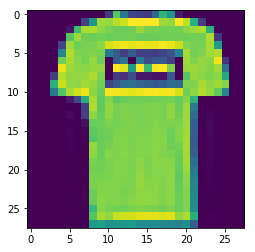

In [3]:
plt.imshow(X_train[1].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5814

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

### Решение:

Окружаю код из двумя ячейками выше функцией и с помощью неё получаю точки для графика функции качества. Для дисперсии также завожу функцию, чтобы легко получить значения. Содержательная часть решения тривиальна: строю графики по сгенерированным точкам.

In [6]:
n_comp = np.array([3, 5, 7, 12, 18, 25, 33, 40, 48, 55])

In [7]:
def accuracy_value(n_comp):
    """Returns accuracy value for PCA method"""
    
    output = np.empty(n_comp.shape[0])
    
    for idx in range(n_comp.shape[0]):        
        pca = PCA(n_components=n_comp[idx])
        used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        lr.fit(X_train_lowdim, y_train[used_indices])
        output[idx] = accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))
    
    return output

In [8]:
# Let me choose number of iteration for std as n_iter
n_iter = 5

In [12]:
# Compute y_value for accuracy SD
def accuracy_std(n_comp, itr=n_iter):
    """Returns SD for accuracy
    Number of iterations is its
    """
    output = np.empty(n_comp.shape[0])
    
    for idx in range(n_comp.shape[0]):
        temp_array = np.empty(itr)
        for _ in range(itr):
            temp_array[_] = accuracy_value(np.array([n_comp[idx]]))
        output[idx] = np.std(temp_array)
        
    return output

In [ ]:
# These two functions too long to compute, so I had to save samples of their outputs

#accuracy_values = accuracy_value(n_comp)
#accuracy_std_array = accuracy_std(n_comp)

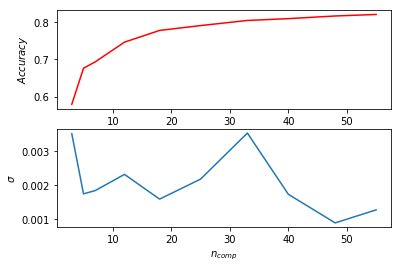

In [21]:
# In The Ideal World there shouldn't be samples

sample_array = np.array([0.5796, 0.6762, 0.6932, 0.746 , 0.7774, 0.7904, 0.8041, 0.809 , 0.8161, 0.8202])
sample_std = np.array([0.00349743, 0.00174057, 0.00183586, 0.00230946, 0.00158669,
                       0.00217127, 0.00351795, 0.00172673, 0.00089084, 0.00127216])

plt.figure(1)

plt.subplot(211)
plt.plot(n_comp, sample_array, 'r')
plt.xlabel(r"$n_{comp}$")
plt.ylabel(r"$Accuracy$")


plt.subplot(212)
plt.plot(n_comp, sample_std)
plt.xlabel(r"$n_{comp}$")
plt.ylabel(r"$\sigma$")

plt.show()

### Вывод:

Получена зависимость функции качества от числа главных компонент в методе PCA. График дисперсии получился менее содержательным ввиду ограниченности вычислительной мощности и неоптимизированной функции accuracy_value.